### Grupo 21: Thiago e Gabriele

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

O dataset abaixo possui 1632 linhas, contendo 1438 títulos de jogos de 9 plataformas diferentes. São 11 variáveis, sendo elas: nome', 'plataforma', 'genero', 'editora', 'vendas', 'lancamento','avaliacao-criticos', 'numero-criticos', 'avaliacao-usuarios',     'numero-usuarios', 'fabricante'.

In [75]:
pasta_drive = ''
dados = pd.read_csv(pasta_drive + "trabalho2_dados_21.csv")
#ordena o resultado pelo nome do jogo
dados = dados.sort_values('nome')
dados.head()

,nome,plataforma,genero,editora,vendas,lancamento,avaliacao-criticos,numero-criticos,avaliacao-usuarios,numero-usuarios,fabricante
1555,0-ji no Kane to Cinderella: Halloween Wedding,PSP,Misc,Quinrose,0.01,NaN,NaN,NaN,NaN,NaN,NaN
738,007: Quantum of Solace,PS3,Action,Activision,1.09,NaN,NaN,NaN,NaN,NaN,NaN
1197,007: Quantum of Solace,Wii,Action,Activision,0.62,NaN,NaN,NaN,NaN,NaN,NaN
1307,1/2 Summer +,PSP,Adventure,Kaga Create,0.01,NaN,NaN,NaN,NaN,NaN,NaN
1456,10 Minute Solution,Wii,Sports,Activision,0.06,29-Jun-10,NaN,NaN,tbd,NaN,Anchor Bay Entertainment


Analisando os tipos de cada varíavel.

In [45]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 1555 to 669
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nome                1632 non-null   object 
 1   plataforma          1632 non-null   object 
 2   genero              1632 non-null   object 
 3   editora             1630 non-null   object 
 4   vendas              1632 non-null   float64
 5   lancamento          1137 non-null   object 
 6   avaliacao-criticos  916 non-null    float64
 7   numero-criticos     916 non-null    float64
 8   avaliacao-usuarios  1112 non-null   object 
 9   numero-usuarios     851 non-null    float64
 10  fabricante          1128 non-null   object 
dtypes: float64(4), object(7)
memory usage: 153.0+ KB


Antes de começarmos a análise, iremos transformar o parâmetro gênero em uma variável categórica. Outra questão, observada pelo .info(), é o tipo da variável  avaliacao-usuarios, vamos passar para float.

In [46]:
dados['genero'] = dados.genero.astype('category')
dados['plataforma'] = dados.plataforma.astype('category')
dados['avaliacao-usuarios'] = pd.to_numeric(dados['avaliacao-usuarios'],errors='coerce')
dados['avaliacao-usuarios'] = dados['avaliacao-usuarios']*10
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 1555 to 669
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   nome                1632 non-null   object  
 1   plataforma          1632 non-null   category
 2   genero              1632 non-null   category
 3   editora             1630 non-null   object  
 4   vendas              1632 non-null   float64 
 5   lancamento          1137 non-null   object  
 6   avaliacao-criticos  916 non-null    float64 
 7   numero-criticos     916 non-null    float64 
 8   avaliacao-usuarios  851 non-null    float64 
 9   numero-usuarios     851 non-null    float64 
 10  fabricante          1128 non-null   object  
dtypes: category(2), float64(5), object(4)
memory usage: 131.5+ KB


Como podemos observar na tabela acima, temos valores nulos no dataframe. Portanto, iremos retirar aquelas linhas que possuem valores nulos, para não atrapalhar a nossa análise.

In [47]:
dados.dropna(axis=0,inplace=True)

In [48]:
dados.isnull().any()

nome                  False
plataforma            False
genero                False
editora               False
vendas                False
lancamento            False
avaliacao-criticos    False
numero-criticos       False
avaliacao-usuarios    False
numero-usuarios       False
fabricante            False
dtype: bool

Analisando a frequência, desvio padrão, média e outros cálculos estatísticos, iremos aplicar o describe() no dataframe.

In [49]:
dados.describe()

,vendas,avaliacao-criticos,numero-criticos,avaliacao-usuarios,numero-usuarios
count,805.000000,805.000000,805.000000,805.000000,805.000000
mean,0.884025,69.073292,34.724224,69.147826,119.853416
std,1.916295,14.531433,21.408221,14.956130,313.970149
min,0.010000,13.000000,4.000000,9.000000,4.000000
25%,0.160000,61.000000,17.000000,62.000000,13.000000
50%,0.380000,72.000000,32.000000,72.000000,29.000000
75%,0.850000,80.000000,49.000000,80.000000,85.000000
max,27.250000,98.000000,101.000000,95.000000,2923.000000


Uma vez que retiramos os valores nulos, todas as variáveis possuem a mesma quantidade de valores.

In [50]:
#describe
print('**Describe das variáveis que não são numéricas')
for i in dados.keys():
    if type(dados[i][0])!=np.float64:
        print(dados[i].describe())
        print("\n")

**Describe das variáveis que não são numéricas
count                              805
unique                             695
top       LEGO Harry Potter: Years 5-7
freq                                 5
Name: nome, dtype: object


count      805
unique       9
top       X360
freq       256
Name: plataforma, dtype: object


count        805
unique        12
top       Action
freq         206
Name: genero, dtype: object


count                 805
unique                 78
top       Electronic Arts
freq                  125
Name: editora, dtype: object


count           805
unique          421
top       20-Oct-09
freq              9
Name: lancamento, dtype: object


count           805
unique          361
top       EA Canada
freq             25
Name: fabricante, dtype: object




## Análise Inicial

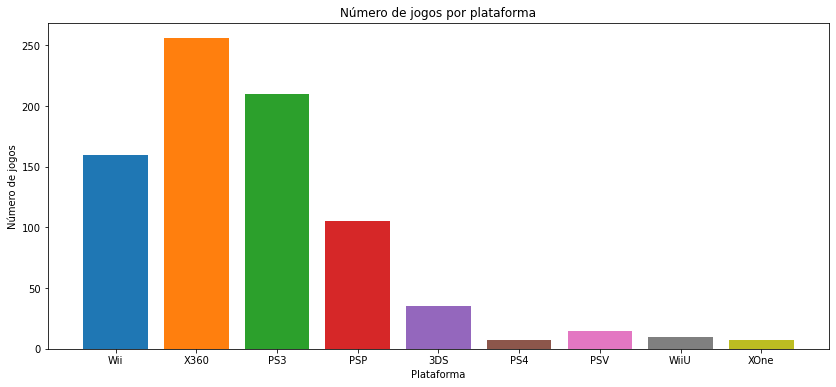

In [51]:
plataformas = dados.plataforma.unique()
plt.figure(figsize=(14,6))
for p in plataformas:
    plt.bar(p, dados[dados.plataforma==p].count()[0])    
plt.title('Número de jogos por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Número de jogos')
plt.show()
#print(arr)

Como podemos observar, este gráfico reforça o resultado mostrado no ínicio da apresentação, que a plataforma X360 é a mais presente no dataset.

In [69]:
dados.sort_values('vendas',ascending=False)[:5]

,nome,plataforma,genero,editora,vendas,lancamento,avaliacao-criticos,numero-criticos,avaliacao-usuarios,numero-usuarios,fabricante
150,New Super Mario Bros. Wii,Wii,Platform,Nintendo,27.25,15-Nov-09,87.0,80.0,83.0,446.0,Nintendo
72,Wii Fit Plus,Wii,Sports,Nintendo,21.43,4-Oct-09,80.0,33.0,73.0,40.0,Nintendo
1227,Grand Theft Auto V,PS3,Action,Take-Two Interactive,16.71,17-Sep-13,97.0,50.0,82.0,2586.0,Rockstar North
1024,Call of Duty: Modern Warfare 2,X360,Shooter,Activision,13.17,10-Nov-09,94.0,100.0,61.0,2456.0,Infinity Ward
877,Call of Duty: Black Ops,PS3,Shooter,Activision,12.08,9-Nov-10,88.0,58.0,60.0,850.0,Treyarch


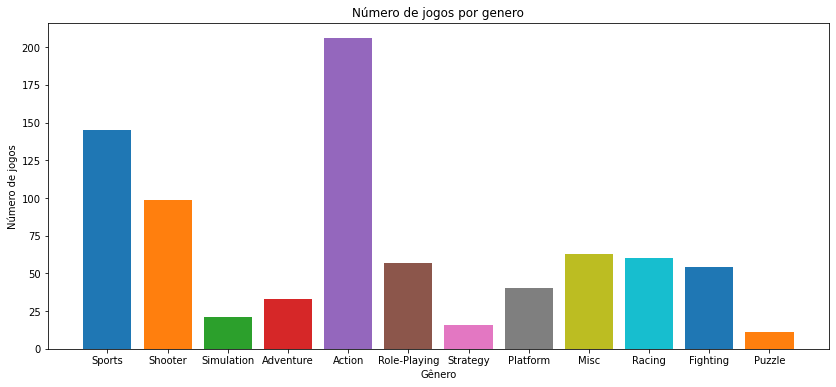

In [52]:
generos = dados.genero.unique()
plt.figure(figsize=(14,6))
for p in generos:
    plt.bar(p, dados[dados.genero==p].count()[0])   
plt.title('Número de jogos por genero')
plt.xlabel('Gênero')
plt.ylabel('Número de jogos')
plt.show()
#print(arr)

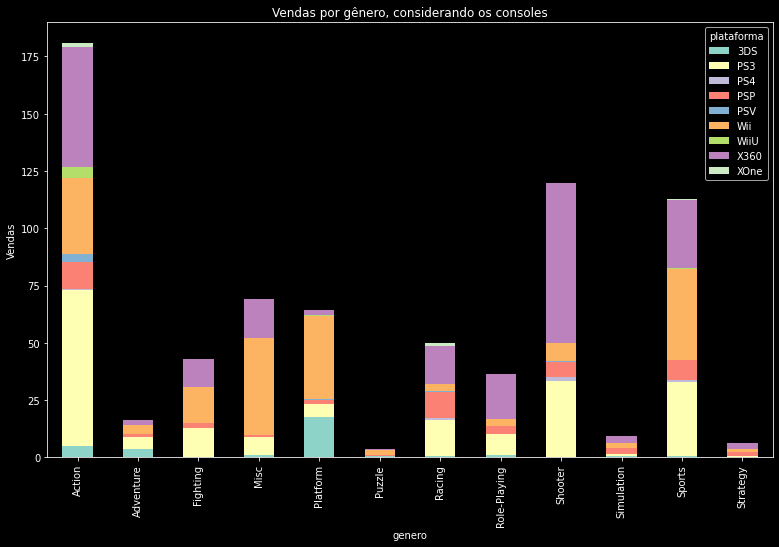

In [53]:
with plt.style.context('dark_background'):
    teste = dados.groupby(['genero','plataforma']).vendas.sum()
    teste.unstack().plot(kind='bar',stacked=True, 
                               grid=False,  figsize=(13,8))
    plt.title('Vendas por gênero, considerando os consoles')
    plt.grid(False)
    plt.ylabel('Vendas')
    plt.show()

De acordo com o gráfico acima, conseguimos observar que os jogos da plaforma X360 abrangem quase todos os gêneros, além de ocuparem o status de maiores vendas na maior parte deles. Outro ponto importante de destacar são as vendas do gênero "Action", que possuem os maiores valores de venda e atendem grande parte das plataformas.

## Análise de Correlação

Nesta etapa do trabalho, realizamos uma análise do grau de correlação entre todas as variáveis numéricas. 

In [54]:
dados.corr()

,vendas,avaliacao-criticos,numero-criticos,avaliacao-usuarios,numero-usuarios
vendas,1.000000,0.322639,0.330162,0.131051,0.556160
avaliacao-criticos,0.322639,1.000000,0.463458,0.608111,0.336030
numero-criticos,0.330162,0.463458,1.000000,0.316025,0.467206
avaliacao-usuarios,0.131051,0.608111,0.316025,1.000000,0.102852
numero-usuarios,0.556160,0.336030,0.467206,0.102852,1.000000


/home/gabic9814/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


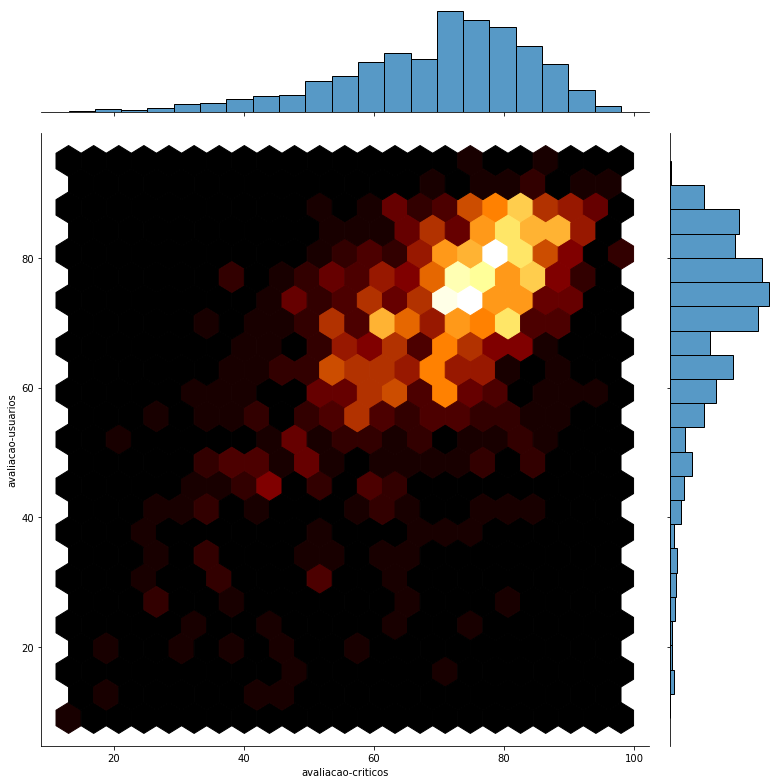

In [55]:
sns.jointplot(x='avaliacao-criticos',y='avaliacao-usuarios',data=dados,
              kind='hex', cmap= 'afmhot', size=11)

Diante do resultado mostrado acima e na tabela, é possível observar que as avaliações dos críticos e dos usuários possuem uma interdependência um pouco mais relavante, quando comparado aos demais valores da tabela, mostrando uma correlação positiva.

O nosso próximo gráfico mostra que, apesar da correlação entre as avaliações(considerando tanto de críticos como usuários) e as vendas ser fraca, a relação entre elas é notória. É importante salientar que correlação não implica, necessariamente, causalidade.

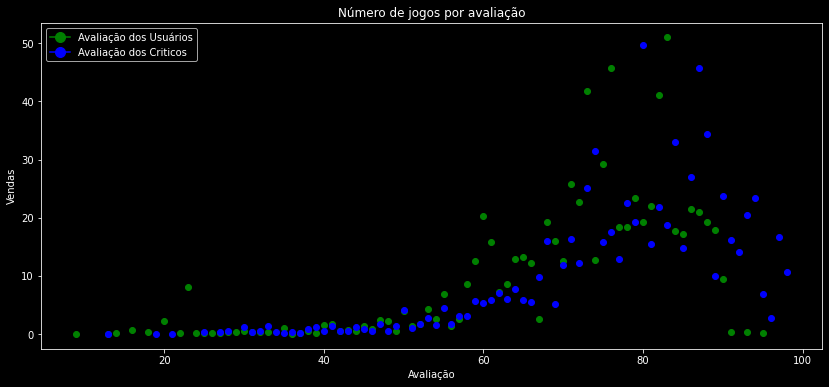

In [58]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(14,6))

    avaliacoes = dados['avaliacao-usuarios'].unique()
    for p in avaliacoes:
        v = dados[dados['avaliacao-usuarios']==p].vendas.sum()
        plt.scatter(p, v, color='green')

    avaliacoes = dados['avaliacao-criticos'].unique()
    for p in avaliacoes:
        plt.scatter(p, dados[dados['avaliacao-criticos']==p].vendas.sum(), color='blue')

    plt.title('Número de jogos por avaliação')
    plt.xlabel('Avaliação')
    plt.ylabel('Vendas')
    #plt.legend(['Usuarios','Criticos'])
    #plt.xticks(list(range(101,10)))


    line_usuarios = mlines.Line2D([], [], color='green', marker='o', 
                              markersize=10, label='Avaliação dos Usuários')

    line_criticos = mlines.Line2D([], [], color='blue', marker='o', 
                              markersize=10, label='Avaliação dos Criticos')

    plt.legend(handles=[line_usuarios,line_criticos])

    plt.grid(False)
    plt.show()

Um ponto que pudemos observar foram que quanto maior as notas da avaliação, maior aparenta ser a divergência. Além disso, foi possível observar que quando as avaliações começam a passar de 80, as vendas tiveram uma queda. 